In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [4]:
%ls

 Volume in drive D has no label.
 Volume Serial Number is 0CC7-DA7A

 Directory of d:\HUYNH\Drive\Github\Data-Analysis

12/23/2020  04:49 PM    <DIR>          .
12/23/2020  04:49 PM    <DIR>          ..
12/23/2020  04:49 PM             7,627 DA0101EN-6-PredictionModel.ipynb
12/23/2020  11:18 AM            26,113 filename.csv
12/23/2020  09:50 PM           766,436 IBM data analysis.ipynb
12/23/2020  11:08 AM               839 pandas.ipynb
12/23/2020  11:04 AM               534 python1.py
               5 File(s)        801,549 bytes
               2 Dir(s)  102,897,647,616 bytes free


# **FIRST IMPORT DATA**

In [5]:
#load data

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
dataset = pd.read_csv(url, header=None, )

In [6]:
# add headers

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
         
dataset.columns = headers

In [7]:
# check data types

dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
# check statistics info

dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [10]:
#save dataset

dataset.to_csv("filename.csv")

In [11]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
# chdck info of rows first and last

dataset.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

# **DATA WRANGLING**

In [13]:
dataset["wheel-base"].mean()

98.75658536585367

In [31]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
#dataset.drop("symboling",axis = 1, inplace=True) # remove columns

dataset.replace("?",np.nan, inplace=True) #replace ? by 0
mean = dataset["wheel-base"].mean()
dataset.replace(np.nan, mean, inplace=True)

In [32]:
dataset.sort_index()

dataset.sort_values(by = "make")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,98.7566,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,98.7566,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,98.7566,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,74,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485


In [33]:
# change data types

dataset["normalized-losses"] = dataset["normalized-losses"].astype("int")

dataset["horsepower"] = dataset["horsepower"].astype("int")


In [34]:
dataset["num-of-doors"] = dataset["num-of-doors"].replace({"two":2,"four":4,"five":5})

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [23]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [24]:
dataset.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [25]:
# count NaN value each column:

for column in dataset.columns.values.tolist():
    print("Name :", column)
    print(dataset[column].isnull().value_counts().to_frame())
    print("")

Name : symboling
       symboling
False        205

Name : normalized-losses
       normalized-losses
False                205

Name : make
       make
False   205

Name : fuel-type
       fuel-type
False        205

Name : aspiration
       aspiration
False         205

Name : num-of-doors
       num-of-doors
False           205

Name : body-style
       body-style
False         205

Name : drive-wheels
       drive-wheels
False           205

Name : engine-location
       engine-location
False              205

Name : wheel-base
       wheel-base
False         205

Name : length
       length
False     205

Name : width
       width
False    205

Name : height
       height
False     205

Name : curb-weight
       curb-weight
False          205

Name : engine-type
       engine-type
False          205

Name : num-of-cylinders
       num-of-cylinders
False               205

Name : engine-size
       engine-size
False          205

Name : fuel-system
       fuel-system
False          

# Data Normalization

In [35]:
# Simple feature scaling:

dataset["horsepower simple scaled"] = dataset["horsepower"] / dataset["horsepower"].max()

# Min-Max scaling:

dataset["horsepower Min-Max scaled"] = (dataset["horsepower"] - dataset["horsepower"].min()) / (dataset["horsepower"].max() - dataset["horsepower"].min())

# Z-score:

dataset["horsepower Z-score scaled"] = (dataset["horsepower"] - dataset["horsepower"].mean()) / (dataset["horsepower"].std())

In [36]:
dataset[["horsepower simple scaled","horsepower Min-Max scaled","horsepower Z-score scaled"]].describe()

,horsepower simple scaled,horsepower Min-Max scaled,horsepower Z-score scaled
count,205.000000,205.000000,2.050000e+02
mean,0.361789,0.234146,1.668042e-16
std,0.137236,0.164683,1.000000e+00
min,0.166667,0.000000,-1.421797e+00
25%,0.243056,0.091667,-8.651732e-01
50%,0.329861,0.195833,-2.326464e-01
75%,0.402778,0.283333,2.986761e-01
max,1.000000,1.000000,4.650460e+00


In [37]:
# Binning

bins = np.linspace(dataset["horsepower"].min(),dataset["horsepower"].max(),4)

group_names = ["low", "middle","high"]

dataset["Binned Names"] = pd.cut(dataset["horsepower"],bins,labels = group_names, include_lowest= True)

In [38]:
dataset[["horsepower","Binned Names"]]

,horsepower,Binned Names
0,111,low
1,111,low
2,154,middle
3,102,low
4,115,low
...,...,...
200,114,low
201,160,middle
202,134,middle
203,106,low


In [39]:
dataset["Binned Names"].value_counts().to_frame()

,Binned Names
low,163
middle,40
high,2


# **Tuning**

In [40]:
#dataset["fuel-type"].get_dummies()

dataset[["diesel","gas"]] = pd.get_dummies(dataset["fuel-type"])

In [41]:
dataset

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,horsepower simple scaled,horsepower Min-Max scaled,horsepower Z-score scaled,Binned Names,diesel,gas
0,3,98,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,5000,21,27,13495,0.385417,0.262500,0.172171,low,0,1
1,3,98,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,5000,21,27,16500,0.385417,0.262500,0.172171,low,0,1
2,1,98,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,5000,19,26,16500,0.534722,0.441667,1.260117,middle,0,1
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,...,5500,24,30,13950,0.354167,0.225000,-0.055539,low,0,1
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,...,5500,18,22,17450,0.399306,0.279167,0.273375,low,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,5400,23,28,16845,0.395833,0.275000,0.248074,low,0,1
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,5300,19,25,19045,0.555556,0.466667,1.411923,middle,0,1
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,5500,18,23,21485,0.465278,0.358333,0.754095,middle,0,1
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,4800,26,27,22470,0.368056,0.241667,0.045665,low,1,0


In [42]:
# rename column

dataset.rename(columns={'num-of-doors':'door nums'}, inplace=True)
dataset.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,door nums,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,horsepower simple scaled,horsepower Min-Max scaled,horsepower Z-score scaled,Binned Names,diesel,gas
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,5400,23,28,16845,0.395833,0.275000,0.248074,low,0,1
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,5300,19,25,19045,0.555556,0.466667,1.411923,middle,0,1
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,5500,18,23,21485,0.465278,0.358333,0.754095,middle,0,1
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,4800,26,27,22470,0.368056,0.241667,0.045665,low,1,0
204,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,5400,19,25,22625,0.395833,0.275000,0.248074,low,0,1


# **PLOT**

(array([163.,  40.,   2.]),
 array([ 48., 128., 208., 288.]),
 <BarContainer object of 3 artists>)

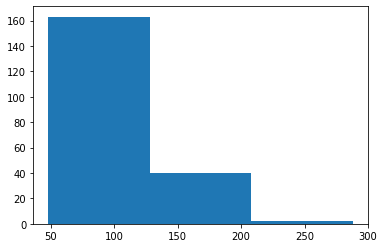

In [43]:
plt.hist(dataset["horsepower"], bins = 3)

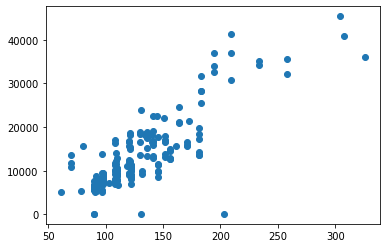

In [44]:
y = dataset.price.astype("float")
x = dataset["engine-size"].astype("float")

plt.scatter(x,y)



# **GROUPBY**

In [45]:
 dataset.price = dataset.price.astype("float")

dataset_groupby = dataset[["drive-wheels","body-style","price"]].groupby(["drive-wheels","body-style"], as_index= False).mean().sort_values(by = "price")

dataset_groupby

,drive-wheels,body-style,price
0,4wd,hatchback,3850.878293
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
2,4wd,wagon,9095.750000
6,fwd,sedan,9470.991459
7,fwd,wagon,9997.333333
3,fwd,convertible,11595.000000
1,4wd,sedan,12647.333333
10,rwd,hatchback,13588.355610
12,rwd,wagon,16994.222222


In [46]:
dataset_pivot = dataset_groupby.pivot(index = "drive-wheels", columns = "body-style") 
dataset_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   3850.878293  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9470.991459   
rwd              23949.6  24202.714286  13588.355610  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

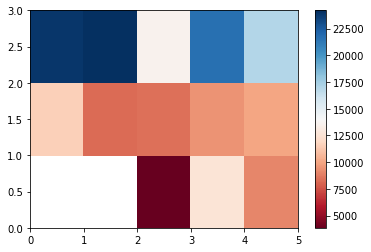

In [47]:
plt.pcolor(dataset_pivot, cmap = "RdBu")
plt.colorbar()
plt.show()

(0.0, 47665.062170731704)

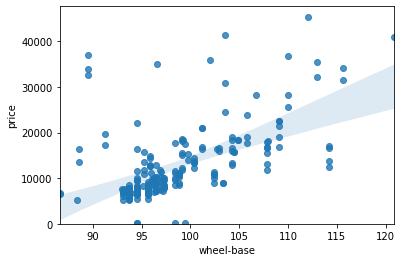

In [48]:
sns.regplot("wheel-base","price", data = dataset)
plt.ylim(0,)

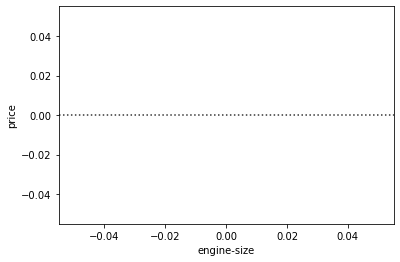

In [49]:
sns.residplot(dataset["engine-size"].astype("float"),dataset["price"].astype("float"),data = dataset)
plt.show()


# **STATISTIC**

In [50]:
dataset.corr()

,symboling,normalized-losses,door nums,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,horsepower simple scaled,horsepower Min-Max scaled,horsepower Z-score scaled,diesel,gas
symboling,1.000000,0.425705,-0.095908,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,0.071173,-0.035823,0.034606,-0.071553,0.071173,0.071173,0.071173,-0.194311,0.194311
normalized-losses,0.425705,1.000000,-0.016270,-0.111420,-0.067152,-0.003383,-0.342895,-0.015320,-0.019035,-0.111867,0.076860,-0.115889,-0.077756,0.017786,0.076860,0.076860,0.076860,-0.109004,0.109004
door nums,-0.095908,-0.016270,1.000000,0.005296,-0.011202,-0.013898,0.029586,-0.024921,-0.038349,0.141627,-0.066001,0.070150,0.070804,-0.033351,-0.066001,-0.066001,-0.066001,0.152428,-0.152428
wheel-base,-0.531954,-0.111420,0.005296,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,0.352599,-0.470414,-0.544082,0.578945,0.352599,0.352599,0.352599,0.308346,-0.308346
length,-0.357612,-0.067152,-0.011202,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,0.553725,-0.670909,-0.704662,0.685133,0.553725,0.553725,0.553725,0.212679,-0.212679
width,-0.232919,-0.003383,-0.013898,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,0.641653,-0.642704,-0.677218,0.696026,0.641653,0.641653,0.641653,0.233880,-0.233880
height,-0.541038,-0.342895,0.029586,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.109568,-0.048640,-0.107358,0.158290,-0.109568,-0.109568,-0.109568,0.284631,-0.284631
curb-weight,-0.227691,-0.015320,-0.024921,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,0.750985,-0.757414,-0.797465,0.800077,0.750985,0.750985,0.750985,0.217275,-0.217275
engine-size,-0.105790,-0.019035,-0.038349,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,0.810424,-0.653658,-0.677470,0.838427,0.810424,0.810424,0.810424,0.069594,-0.069594
compression-ratio,-0.178515,-0.111867,0.141627,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,-0.205151,0.324701,0.265201,0.077923,-0.205151,-0.205151,-0.205151,0.984356,-0.984356


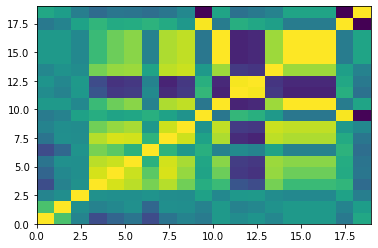

In [51]:
plt.pcolor(dataset.corr()) #heatmap

In [52]:
pearson_coef, p_value = stats.pearsonr(dataset["wheel-base"].astype("float"), dataset["price"])

print ("pearson_coef :", pearson_coef, "-----", "p_value :", p_value)

pearson_coef : nan ----- p_value : nan


In [53]:
p_value < 0.001

# statistically significant although linear relationship is not extremely strong

False

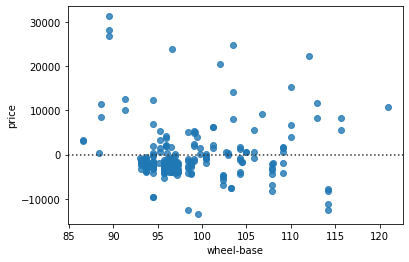

In [54]:
sns.residplot(x = dataset["wheel-base"].astype("float"),y = dataset["price"].astype("float"),data = dataset)
plt.show()

# **LINEAR MODEL**

In [55]:
lm = LinearRegression()
lm

LinearRegression()

In [61]:
dataset['highway-mpg'] = dataset['highway-mpg'].astype("float")

X = dataset[['highway-mpg']]
Y = dataset[['price']]

In [62]:
lm.fit(X,Y)

LinearRegression()

In [63]:
y_hat = lm.predict(X)

In [64]:
y_hat[0:5]

array([[15977.21960143],
       [15977.21960143],
       [16783.85418134],
       [13557.3158617 ],
       [20010.39250099]])

In [65]:
print (lm.intercept_, lm.coef_)

[37756.35325905] [[-806.63457991]]


In [66]:
Z = dataset[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [67]:
lm.fit(Z,dataset["price"])

LinearRegression()

In [68]:
print(lm.intercept_, lm.coef_)

-2078.8267465617373 [ -14.908244      2.98517091  119.63122124 -202.50672976]


(0.0, 48160.22714583789)

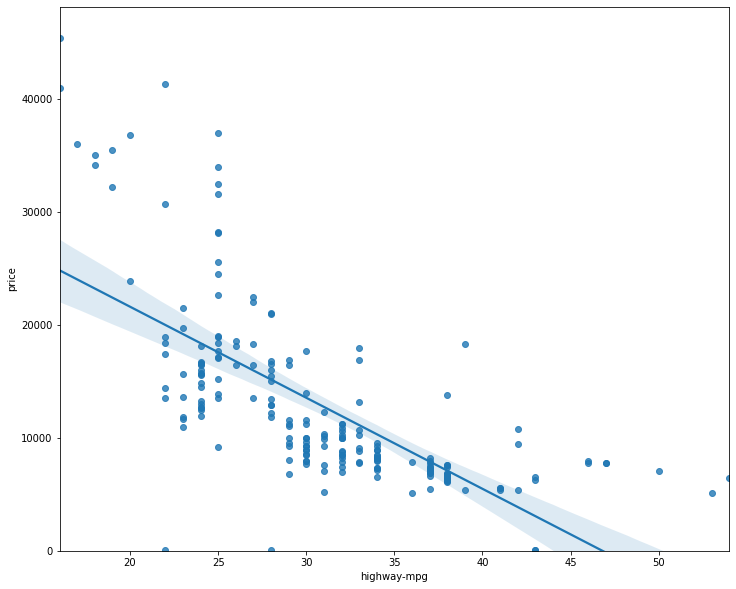

In [69]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=dataset)
plt.ylim(0,)

(0.0, 47665.062170731704)

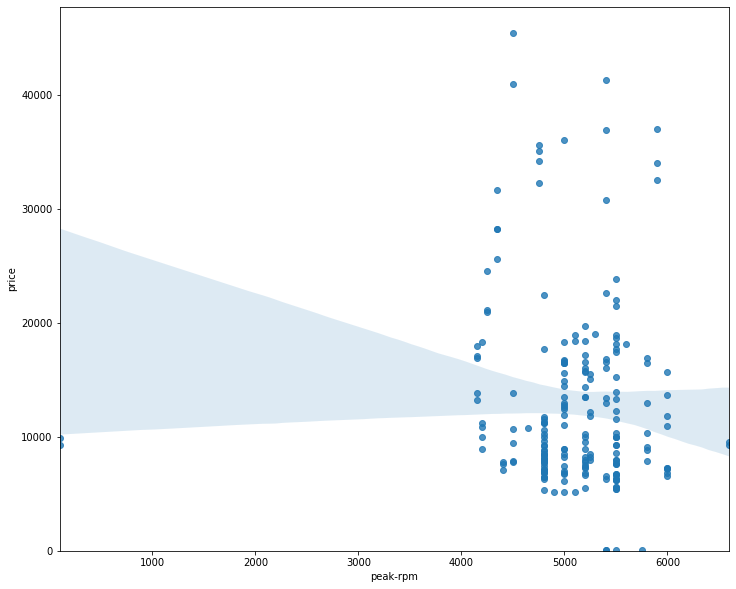

In [70]:
dataset["peak-rpm"] = dataset["peak-rpm"].astype("float")

plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=dataset)
plt.ylim(0,)

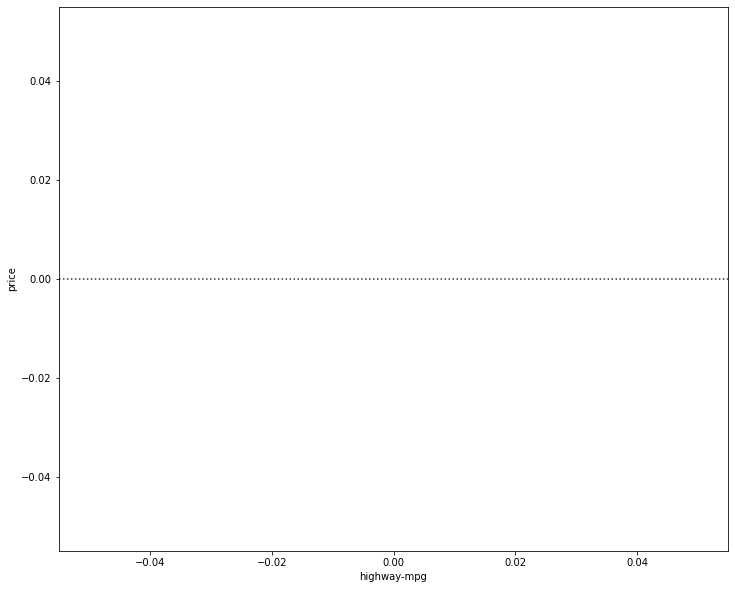

In [71]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(dataset['highway-mpg'], dataset['price'], data = dataset)
plt.show()

In [72]:
Y_hat = lm.predict(Z)

<AxesSubplot:xlabel='price'>

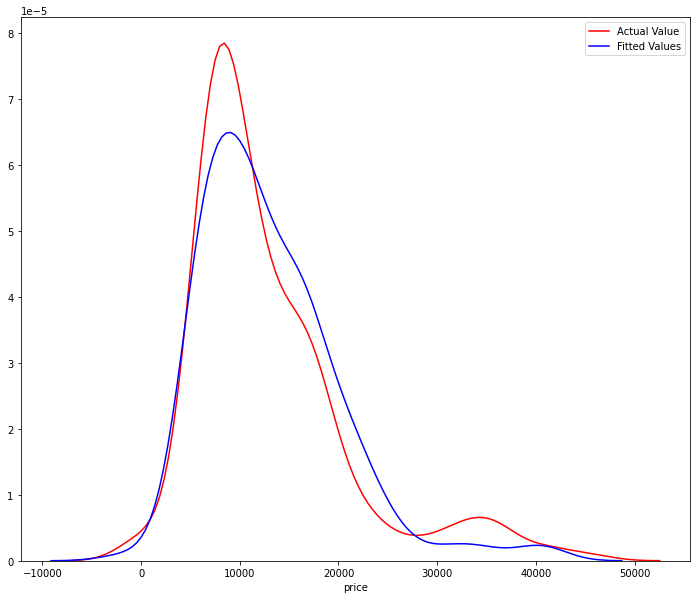

In [73]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(dataset['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [74]:
x = dataset['highway-mpg']
y = dataset['price']

In [78]:
f = np.polyfit(x,y,2)
p = np.poly1d(f)

print (p)

       2
43.63 x - 3650 x + 8.189e+04


In [79]:
pr = PolynomialFeatures(degree= 2)

In [80]:
Z_pr = pr.fit_transform(Z)

In [81]:
Z_pr.shape

(205, 15)

In [82]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [83]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [84]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [85]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13670.84334513, 13670.84334513, 17804.21173712, 10782.18131341])

In [86]:
lm.fit (X,Y)
lm.score(X,Y) # r_squared score

0.4731036525349124

In [87]:
mse = mean_squared_error(dataset["price"], y_hat)
mse

34197062.02932357

In [88]:
r_squared = r2_score(y , p(x))
r_squared

0.6110974047966229

In [109]:
def distributionplot(Redfunction, Bluefunction, RedName, BlueName, title):
    height = 10
    width = 12
    plt.figure(figsize=(height,width))
    
    ax1 = sns.distplot(Redfunction, hist = False, color= 'r', label = RedName)
    ax2 = sns.distplot(Bluefunction, hist = False, color= 'b', label= BlueName, ax = ax1)

    plt.title(title)
    plt.xlabel("Price")
    plt.ylabel("Proportion of Cars")

    plt.show()
    plt.close()

In [90]:
def PollyPlot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width,height))

    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, ytrain, 'ro', label = "Training data")
    plt.plot(xtest, ytest, 'go', label = "Test data")

    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = "Predicted Function")

    plt.ylim([-10000,60000])
    plt.ylabel("Price")
    plt.legend()


In [91]:
y_data = dataset["price"]

In [92]:
x_data = dataset._get_numeric_data().drop("price", axis = 1)

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.1, random_state=1)

In [94]:
lre = LinearRegression()

In [95]:
lre.fit(x_train[["horsepower"]],y_train)

LinearRegression()

In [96]:
lre.score(x_train[["horsepower"]],y_train)

0.4871120112028763

In [97]:
lre.score(x_test[["horsepower"]],y_test)

0.5926760470469579

In [98]:
Rcross = cross_val_score(lre, x_data[["horsepower"]], y_data, cv = 4)

In [99]:
Rcross

array([ 0.60444355,  0.47349012, -0.04345911,  0.35925986])

In [100]:
Rcross.mean()

0.3484336040902322

In [101]:
y_hat = cross_val_predict(lre, x_data[["horsepower"]], y_data, cv = 4)

# **OVERFITTING, UNDERFITTING, MODEL SELECTION**

In [102]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [104]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[:5]

array([ 5527.90040241, 10648.28401397,  8458.94522528, 15277.15058327,
        6828.97559017])

In [105]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[:5]

array([ 6154.30101363,  7084.04129733,  6363.79520182,  4342.08745777,
       10182.6871859 ])

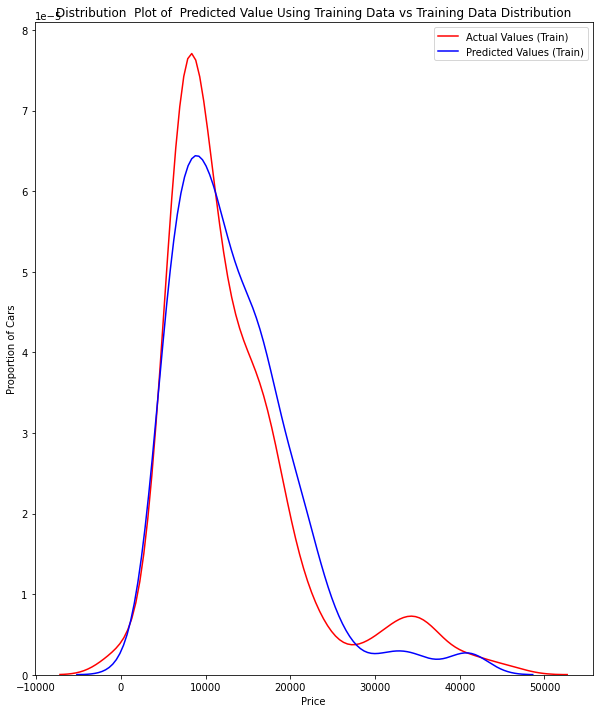

In [110]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distributionplot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

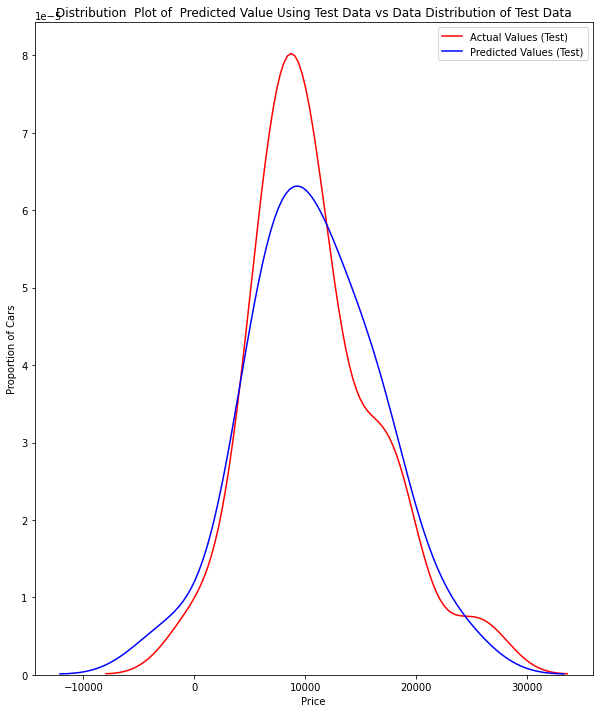

In [112]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distributionplot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [114]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [119]:
poly = LinearRegression()
poly.fit(x_train_pr, np.array(y_train))

LinearRegression()

In [121]:
yhat = poly.predict(x_test_pr)
yhat[:5]

array([ 6981.5181811 , 20673.66020472, 14484.16675292,  8915.10647528,
       12709.46574947])

In [122]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6981.5181811  20673.66020472 14484.16675292  8915.10647528]
True values: [ 6795. 15750. 15250.  5151.]


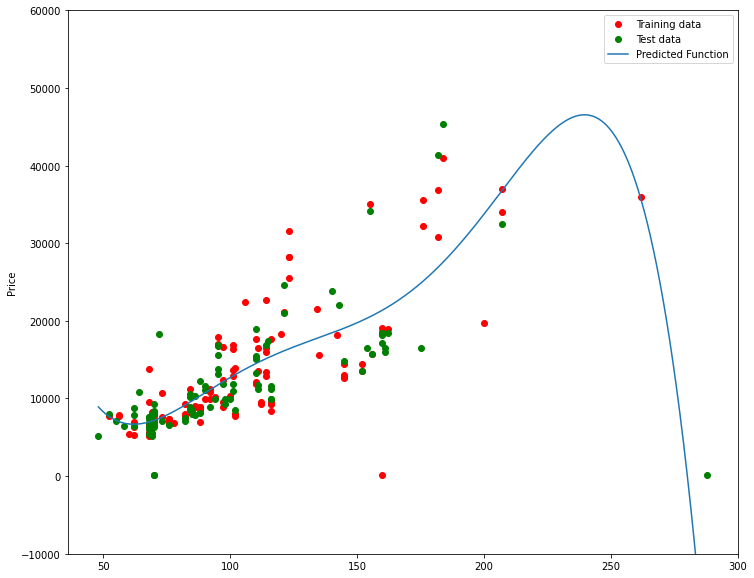

In [123]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [124]:
poly.score(x_train_pr, y_train)

0.630927462603617

In [125]:
poly.score(x_test_pr, y_test)

0.5303837641904896

Text(3, 0.75, 'Maximum R^2 ')

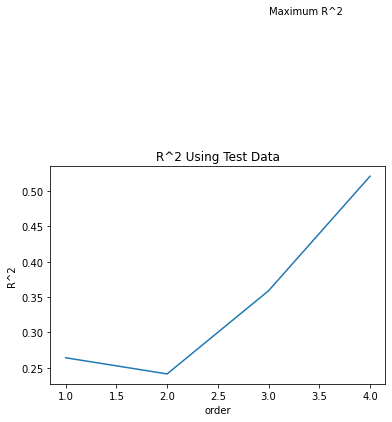

In [127]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, np.array(y_train))
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')   

In [136]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,np.array(y_train))
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], np.array(y_train),np.array(y_test), poly, pr)

In [137]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

# **RIDGE REGRESSION**

In [138]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [140]:
RigeModel=Ridge(alpha=0.1)

In [141]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [143]:
y_hat = RigeModel.predict(x_test_pr)

In [145]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values) # y_test is a Series of pandas lib

predicted: [ 6981.5181811  20673.66020472 14484.16675292  8915.10647528]
test set : [ 6795. 15750. 15250.  5151.]


In [152]:
Re_train = []
Re_test = []

dummy = []

Alpha = 10 * np.array(range(0,1000))

for alpha in Alpha:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr,np.array(y_train))
    Re_test.append(RigeModel.score(x_test_pr,y_test))
    Re_train.append(RigeModel.score(x_train_pr,y_train))

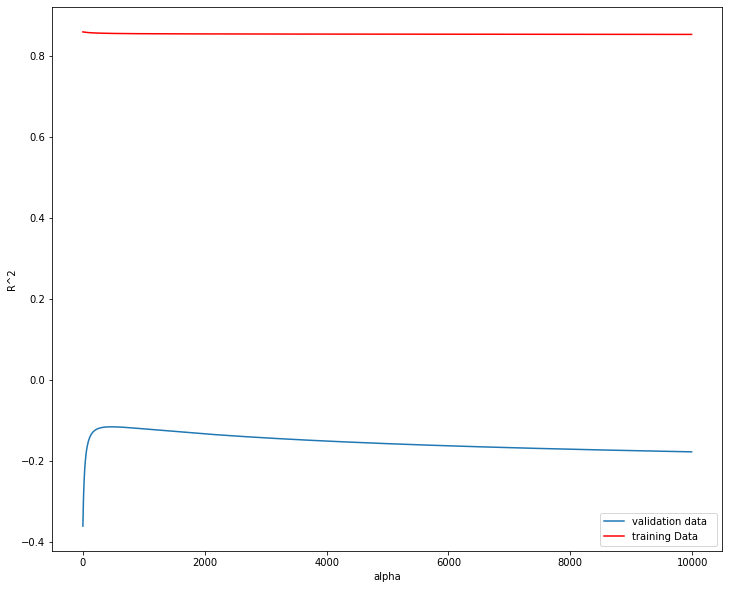

In [156]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Re_test, label='validation data  ')
plt.plot(Alpha,Re_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

# **GRID SEARCH**

In [158]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [159]:
RR=Ridge()
RR

Ridge()

In [160]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [163]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [164]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [165]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.6506524437544295